In [175]:
import pandas as pd
import os
import matplotlib.pyplot as plt
os.chdir ("C:\\Users\\Hp\\Desktop\\Chaimae\\stage\\PFE\\Dataset\\clean_data")
cwd=os.getcwd()
print(cwd)
df=pd.read_excel('dataset_final.xlsx')

C:\Users\Hp\Desktop\Chaimae\stage\PFE\Dataset\clean_data


In [176]:
df.head()

,Id_User,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,Durée,duree,dt_dep,dt_arr,prix,nombre_place,Moyen_de_transport
0,74517,RABAT,34.022405,-6.834543,CASABLANCA,33.595063,-7.618777,92.718000,67.433333,1:07,2018-07-31 21:31:00,2018-07-31 22:38,18.5436,4,Voiture
1,90486,CASABLANCA,33.595063,-7.618777,TAZA,34.230155,-4.010104,403.209999,230.633333,3:50,2018-04-29 11:12:00,2018-04-29 15:02,80.6420,2,Voiture
2,69046,KHENIFRA,32.935772,-5.669650,AGADIR,30.422037,-9.559509,649.335999,1169.650000,19:29,2018-07-15 06:24:00,2018-07-16 01:53,194.8008,35,autocar
3,86417,RABAT,34.022405,-6.834543,TETOUAN,35.570175,-5.374278,270.819000,573.600000,9:33,2018-12-05 06:00:00,2018-12-05 15:33,81.2457,20,autocar
4,79358,OUARZAZATE,30.920193,-6.910923,TEMARA,33.917166,-6.923804,509.914999,339.133333,5:39,2018-05-23 15:30:00,2018-05-23 21:09,142.7762,4,Voiture


In [177]:
X = df.iloc[:, 0:14].values

In [178]:
X

array([[74517, 'RABAT', 34.022405, ..., '2018-07-31 22:38',
        18.5435999350272, 4],
       [90486, 'CASABLANCA', 33.5950627, ..., '2018-04-29 15:02',
        80.64199986416641, 2],
       [69046, 'KHENIFRA', 32.9357718, ..., '2018-07-16 01:53',
        194.8007997669888, 35],
       ...,
       [99781, 'ELJADIDA', 36.8603699, ..., '2018-04-01 06:29',
        224.7227996637889, 12],
       [93331, 'MEKNES', 42.6515447, ..., '2019-03-18 12:41',
        95.03171987645956, 4],
       [68108, 'TAZA', 34.230155, ..., '2019-02-20 07:29',
        150.3977998457088, 22]], dtype=object)

In [179]:
y= df.iloc[:, 14].values

In [180]:
y

array(['Voiture', 'Voiture', 'autocar', ..., 'CTM', 'Voiture', 'autocar'],
      dtype=object)

In [181]:
#Encoder les valeurs
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [182]:
labelencoder_X_1 = LabelEncoder()

In [183]:
#Encoder la ville de depart
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

In [184]:
X[:, 1]

array([22, 5, 13, ..., 6, 16, 28], dtype=object)

In [185]:
labelencoder_X_2 = LabelEncoder()

In [186]:
#Encoder la ville d'arrivee
X[:, 4] = labelencoder_X_2.fit_transform(X[:, 4])

In [187]:
X[:, 4]

array([5, 28, 0, ..., 28, 6, 6], dtype=object)

In [188]:
print("Before encoding: ")
print(X[100:110])

Before encoding: 
[[80154 19 30.920193 -6.910923 6 36.8603699 6.925006157641654
  398.497999413888 323.2833333333334 '5:23'
  Timestamp('2018-09-19 12:32:00') '2018-09-19 17:55' 119.5493998241664 1]
 [71688 22 34.022405 -6.834543 23 32.24941445 -8.994165445880364
  331.766999460864 562.85 '9:22' Timestamp('2018-07-31 23:04:00')
  '2018-08-01 08:26' 99.53009983825919 21]
 [83934 17 33.6958383 -7.3893292 5 33.5950627 -7.6187768 29.865999955968
  30.65 '0:30' Timestamp('2018-07-11 08:09:00') '2018-07-11 08:39'
  5.9731999911936 3]
 [64340 22 34.022405 -6.834543 23 32.24941445 -8.994165445880364
  331.766999460864 375.2333333333333 '6:15'
  Timestamp('2018-07-25 07:17:00') '2018-07-25 13:32' 149.2951497573888
  19]
 [85352 14 32.885508 -6.909238 31 33.894009 -6.31673 179.3910007296
  149.2833333333333 '2:29' Timestamp('2019-03-14 15:34:00')
  '2019-03-14 18:03' 53.81730021888 2]
 [95549 27 35.777103 -5.803792 14 32.885508 -6.909238 394.32100017024
  795.4499999999999 '13:15' Timestamp('201

In [189]:
df.dtypes

Id_User                        int64
Ville de depart               object
Latitude                     float64
Longitude                    float64
Ville d'arrivée               object
Latitude.1                   float64
Longitude.1                  float64
Distance                     float64
Durée                        float64
duree                         object
dt_dep                datetime64[ns]
dt_arr                        object
prix                         float64
nombre_place                   int64
Moyen_de_transport            object
dtype: object

In [190]:
#convertir date_arrivée en format date
df['dt_arr'] = pd.to_datetime(df['dt_arr'], errors='coerce')

In [191]:
df.dtypes

Id_User                        int64
Ville de depart               object
Latitude                     float64
Longitude                    float64
Ville d'arrivée               object
Latitude.1                   float64
Longitude.1                  float64
Distance                     float64
Durée                        float64
duree                         object
dt_dep                datetime64[ns]
dt_arr                datetime64[ns]
prix                         float64
nombre_place                   int64
Moyen_de_transport            object
dtype: object

In [192]:
df.dt_arr.dt.weekday_name.head()

0      Tuesday
1       Sunday
2       Monday
3    Wednesday
4    Wednesday
Name: dt_arr, dtype: object

In [193]:
%matplotlib inline

In [194]:
#pretraitement date 
df['Year_dep'] = df.dt_dep.dt.year

In [195]:
df['Year_dep'].head()


0    2018
1    2018
2    2018
3    2018
4    2018
Name: Year_dep, dtype: int64

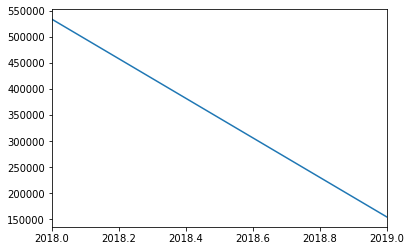

In [197]:
df.Year_dep.value_counts().sort_index().plot()

In [198]:
df.dtypes

Id_User                        int64
Ville de depart               object
Latitude                     float64
Longitude                    float64
Ville d'arrivée               object
Latitude.1                   float64
Longitude.1                  float64
Distance                     float64
Durée                        float64
duree                         object
dt_dep                datetime64[ns]
dt_arr                datetime64[ns]
prix                         float64
nombre_place                   int64
Moyen_de_transport            object
Year_dep                       int64
dtype: object

In [199]:
df['Month_dep'] = df.dt_dep.dt.month

In [200]:
df.head()

,Id_User,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,Durée,duree,dt_dep,dt_arr,prix,nombre_place,Moyen_de_transport,Year_dep,Month_dep
0,74517,RABAT,34.022405,-6.834543,CASABLANCA,33.595063,-7.618777,92.718000,67.433333,1:07,2018-07-31 21:31:00,2018-07-31 22:38:00,18.5436,4,Voiture,2018,7
1,90486,CASABLANCA,33.595063,-7.618777,TAZA,34.230155,-4.010104,403.209999,230.633333,3:50,2018-04-29 11:12:00,2018-04-29 15:02:00,80.6420,2,Voiture,2018,4
2,69046,KHENIFRA,32.935772,-5.669650,AGADIR,30.422037,-9.559509,649.335999,1169.650000,19:29,2018-07-15 06:24:00,2018-07-16 01:53:00,194.8008,35,autocar,2018,7
3,86417,RABAT,34.022405,-6.834543,TETOUAN,35.570175,-5.374278,270.819000,573.600000,9:33,2018-12-05 06:00:00,2018-12-05 15:33:00,81.2457,20,autocar,2018,12
4,79358,OUARZAZATE,30.920193,-6.910923,TEMARA,33.917166,-6.923804,509.914999,339.133333,5:39,2018-05-23 15:30:00,2018-05-23 21:09:00,142.7762,4,Voiture,2018,5


In [201]:
df['day_dep'] = df.dt_dep.dt.day

In [202]:
df.head()

,Id_User,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,Durée,duree,dt_dep,dt_arr,prix,nombre_place,Moyen_de_transport,Year_dep,Month_dep,day_dep
0,74517,RABAT,34.022405,-6.834543,CASABLANCA,33.595063,-7.618777,92.718000,67.433333,1:07,2018-07-31 21:31:00,2018-07-31 22:38:00,18.5436,4,Voiture,2018,7,31
1,90486,CASABLANCA,33.595063,-7.618777,TAZA,34.230155,-4.010104,403.209999,230.633333,3:50,2018-04-29 11:12:00,2018-04-29 15:02:00,80.6420,2,Voiture,2018,4,29
2,69046,KHENIFRA,32.935772,-5.669650,AGADIR,30.422037,-9.559509,649.335999,1169.650000,19:29,2018-07-15 06:24:00,2018-07-16 01:53:00,194.8008,35,autocar,2018,7,15
3,86417,RABAT,34.022405,-6.834543,TETOUAN,35.570175,-5.374278,270.819000,573.600000,9:33,2018-12-05 06:00:00,2018-12-05 15:33:00,81.2457,20,autocar,2018,12,5
4,79358,OUARZAZATE,30.920193,-6.910923,TEMARA,33.917166,-6.923804,509.914999,339.133333,5:39,2018-05-23 15:30:00,2018-05-23 21:09:00,142.7762,4,Voiture,2018,5,23


In [203]:
df['weekday_name_dep'] = df.dt_dep.dt.weekday_name

In [204]:
df['Hour_dep'] = df.dt_dep.dt.hour

In [205]:
df['Hour_dep'].head()

0    21
1    11
2     6
3     6
4    15
Name: Hour_dep, dtype: int64

In [206]:
df['minute_dep'] = df.dt_dep.dt.minute

In [207]:
df['minute_dep'].head()

0    31
1    12
2    24
3     0
4    30
Name: minute_dep, dtype: int64

In [208]:
df.head()

,Id_User,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,Durée,duree,...,dt_arr,prix,nombre_place,Moyen_de_transport,Year_dep,Month_dep,day_dep,weekday_name_dep,Hour_dep,minute_dep
0,74517,RABAT,34.022405,-6.834543,CASABLANCA,33.595063,-7.618777,92.718000,67.433333,1:07,...,2018-07-31 22:38:00,18.5436,4,Voiture,2018,7,31,Tuesday,21,31
1,90486,CASABLANCA,33.595063,-7.618777,TAZA,34.230155,-4.010104,403.209999,230.633333,3:50,...,2018-04-29 15:02:00,80.6420,2,Voiture,2018,4,29,Sunday,11,12
2,69046,KHENIFRA,32.935772,-5.669650,AGADIR,30.422037,-9.559509,649.335999,1169.650000,19:29,...,2018-07-16 01:53:00,194.8008,35,autocar,2018,7,15,Sunday,6,24
3,86417,RABAT,34.022405,-6.834543,TETOUAN,35.570175,-5.374278,270.819000,573.600000,9:33,...,2018-12-05 15:33:00,81.2457,20,autocar,2018,12,5,Wednesday,6,0
4,79358,OUARZAZATE,30.920193,-6.910923,TEMARA,33.917166,-6.923804,509.914999,339.133333,5:39,...,2018-05-23 21:09:00,142.7762,4,Voiture,2018,5,23,Wednesday,15,30


In [211]:
df['Year_arr'] = df.dt_arr.dt.year
df['Month_arr'] = df.dt_arr.dt.month
df['day_arr'] = df.dt_arr.dt.day
df['weekday_name_arr'] = df.dt_arr.dt.weekday_name
df['Hour_arr'] = df.dt_arr.dt.hour
df['minute_arr'] = df.dt_arr.dt.minute

In [212]:
df.head()

,Id_User,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,Durée,duree,...,day_dep,weekday_name_dep,Hour_dep,minute_dep,Year_arr,Month_arr,day_arr,weekday_name_arr,minute_arr,Hour_arr
0,74517,RABAT,34.022405,-6.834543,CASABLANCA,33.595063,-7.618777,92.718000,67.433333,1:07,...,31,Tuesday,21,31,2018,7,31,Tuesday,31,21
1,90486,CASABLANCA,33.595063,-7.618777,TAZA,34.230155,-4.010104,403.209999,230.633333,3:50,...,29,Sunday,11,12,2018,4,29,Sunday,12,11
2,69046,KHENIFRA,32.935772,-5.669650,AGADIR,30.422037,-9.559509,649.335999,1169.650000,19:29,...,15,Sunday,6,24,2018,7,15,Sunday,24,6
3,86417,RABAT,34.022405,-6.834543,TETOUAN,35.570175,-5.374278,270.819000,573.600000,9:33,...,5,Wednesday,6,0,2018,12,5,Wednesday,0,6
4,79358,OUARZAZATE,30.920193,-6.910923,TEMARA,33.917166,-6.923804,509.914999,339.133333,5:39,...,23,Wednesday,15,30,2018,5,23,Wednesday,30,15


In [227]:
df['duree'] = df['dt_arr'] - df['dt_dep']

In [228]:
df['duree'].head()

0   01:07:00
1   03:50:00
2   19:29:00
3   09:33:00
4   05:39:00
Name: duree, dtype: timedelta64[ns]

In [230]:
df['duree'] = pd.to_datetime(df['duree'], errors='coerce')
df['hour_duree'] = df.duree.dt.hour
df['minute_duree'] = df.duree.dt.minute


In [231]:
df['hour_duree'].head()

0     1
1     3
2    19
3     9
4     5
Name: hour_duree, dtype: int64

In [232]:
df['minute_duree'].head()

0     7
1    50
2    29
3    33
4    39
Name: minute_duree, dtype: int64

In [233]:
df.head()

,Id_User,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,Durée,duree,...,minute_dep,Year_arr,Month_arr,day_arr,weekday_name_arr,minute_arr,Hour_arr,durree_test,hour_duree,minute_duree
0,74517,RABAT,34.022405,-6.834543,CASABLANCA,33.595063,-7.618777,92.718000,67.433333,1970-01-01 01:07:00,...,31,2018,7,31,Tuesday,31,21,1970-01-01 01:07:00,1,7
1,90486,CASABLANCA,33.595063,-7.618777,TAZA,34.230155,-4.010104,403.209999,230.633333,1970-01-01 03:50:00,...,12,2018,4,29,Sunday,12,11,1970-01-01 03:50:00,3,50
2,69046,KHENIFRA,32.935772,-5.669650,AGADIR,30.422037,-9.559509,649.335999,1169.650000,1970-01-01 19:29:00,...,24,2018,7,15,Sunday,24,6,1970-01-01 19:29:00,19,29
3,86417,RABAT,34.022405,-6.834543,TETOUAN,35.570175,-5.374278,270.819000,573.600000,1970-01-01 09:33:00,...,0,2018,12,5,Wednesday,0,6,1970-01-01 09:33:00,9,33
4,79358,OUARZAZATE,30.920193,-6.910923,TEMARA,33.917166,-6.923804,509.914999,339.133333,1970-01-01 05:39:00,...,30,2018,5,23,Wednesday,30,15,1970-01-01 05:39:00,5,39


In [234]:
df.drop(['durree_test'],axis=1)

,Id_User,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,Durée,duree,...,Hour_dep,minute_dep,Year_arr,Month_arr,day_arr,weekday_name_arr,minute_arr,Hour_arr,hour_duree,minute_duree
0,74517,RABAT,34.022405,-6.834543,CASABLANCA,33.595063,-7.618777,92.718000,67.433333,1970-01-01 01:07:00,...,21,31,2018,7,31,Tuesday,31,21,1,7
1,90486,CASABLANCA,33.595063,-7.618777,TAZA,34.230155,-4.010104,403.209999,230.633333,1970-01-01 03:50:00,...,11,12,2018,4,29,Sunday,12,11,3,50
2,69046,KHENIFRA,32.935772,-5.669650,AGADIR,30.422037,-9.559509,649.335999,1169.650000,1970-01-01 19:29:00,...,6,24,2018,7,15,Sunday,24,6,19,29
3,86417,RABAT,34.022405,-6.834543,TETOUAN,35.570175,-5.374278,270.819000,573.600000,1970-01-01 09:33:00,...,6,0,2018,12,5,Wednesday,0,6,9,33
4,79358,OUARZAZATE,30.920193,-6.910923,TEMARA,33.917166,-6.923804,509.914999,339.133333,1970-01-01 05:39:00,...,15,30,2018,5,23,Wednesday,30,15,5,39
5,88786,ESSAOUIRA,31.511828,-9.762090,TAZA,34.230155,-4.010104,770.075000,448.500000,1970-01-01 07:28:00,...,11,24,2018,8,14,Tuesday,24,11,7,28
6,95432,OUEZZANE,34.796757,-5.578493,TETOUAN,35.570175,-5.374278,127.446999,117.766667,1970-01-01 01:57:00,...,13,0,2019,3,2,Saturday,0,13,1,57
7,73903,OUARZAZATE,30.920193,-6.910923,BENI MELLAL,32.334193,-6.353335,299.233000,274.100000,1970-01-01 04:34:00,...,15,38,2019,1,24,Thursday,38,15,4,34
8,98425,CASABLANCA,33.595063,-7.618777,OUARZAZATE,30.920193,-6.910923,437.146000,622.566667,1970-01-01 10:22:00,...,17,37,2018,4,3,Tuesday,37,17,10,22
9,93117,OUARZAZATE,30.920193,-6.910923,BENI MELLAL,32.334193,-6.353335,299.233000,548.200000,1970-01-01 09:08:00,...,23,44,2018,6,8,Friday,44,23,9,8


In [236]:
df.drop(['Durée','duree'],axis=1)

,Id_User,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,dt_dep,dt_arr,...,minute_dep,Year_arr,Month_arr,day_arr,weekday_name_arr,minute_arr,Hour_arr,durree_test,hour_duree,minute_duree
0,74517,RABAT,34.022405,-6.834543,CASABLANCA,33.595063,-7.618777,92.718000,2018-07-31 21:31:00,2018-07-31 22:38:00,...,31,2018,7,31,Tuesday,31,21,1970-01-01 01:07:00,1,7
1,90486,CASABLANCA,33.595063,-7.618777,TAZA,34.230155,-4.010104,403.209999,2018-04-29 11:12:00,2018-04-29 15:02:00,...,12,2018,4,29,Sunday,12,11,1970-01-01 03:50:00,3,50
2,69046,KHENIFRA,32.935772,-5.669650,AGADIR,30.422037,-9.559509,649.335999,2018-07-15 06:24:00,2018-07-16 01:53:00,...,24,2018,7,15,Sunday,24,6,1970-01-01 19:29:00,19,29
3,86417,RABAT,34.022405,-6.834543,TETOUAN,35.570175,-5.374278,270.819000,2018-12-05 06:00:00,2018-12-05 15:33:00,...,0,2018,12,5,Wednesday,0,6,1970-01-01 09:33:00,9,33
4,79358,OUARZAZATE,30.920193,-6.910923,TEMARA,33.917166,-6.923804,509.914999,2018-05-23 15:30:00,2018-05-23 21:09:00,...,30,2018,5,23,Wednesday,30,15,1970-01-01 05:39:00,5,39
5,88786,ESSAOUIRA,31.511828,-9.762090,TAZA,34.230155,-4.010104,770.075000,2018-08-14 11:24:00,2018-08-14 18:52:00,...,24,2018,8,14,Tuesday,24,11,1970-01-01 07:28:00,7,28
6,95432,OUEZZANE,34.796757,-5.578493,TETOUAN,35.570175,-5.374278,127.446999,2019-03-02 13:00:00,2019-03-02 14:57:00,...,0,2019,3,2,Saturday,0,13,1970-01-01 01:57:00,1,57
7,73903,OUARZAZATE,30.920193,-6.910923,BENI MELLAL,32.334193,-6.353335,299.233000,2019-01-24 15:38:00,2019-01-24 20:12:00,...,38,2019,1,24,Thursday,38,15,1970-01-01 04:34:00,4,34
8,98425,CASABLANCA,33.595063,-7.618777,OUARZAZATE,30.920193,-6.910923,437.146000,2018-04-03 17:37:00,2018-04-04 03:59:00,...,37,2018,4,3,Tuesday,37,17,1970-01-01 10:22:00,10,22
9,93117,OUARZAZATE,30.920193,-6.910923,BENI MELLAL,32.334193,-6.353335,299.233000,2018-06-08 23:44:00,2018-06-09 08:52:00,...,44,2018,6,8,Friday,44,23,1970-01-01 09:08:00,9,8


In [237]:
df.drop(['durree_test'],axis=1)

,Id_User,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,Durée,duree,...,Hour_dep,minute_dep,Year_arr,Month_arr,day_arr,weekday_name_arr,minute_arr,Hour_arr,hour_duree,minute_duree
0,74517,RABAT,34.022405,-6.834543,CASABLANCA,33.595063,-7.618777,92.718000,67.433333,1970-01-01 01:07:00,...,21,31,2018,7,31,Tuesday,31,21,1,7
1,90486,CASABLANCA,33.595063,-7.618777,TAZA,34.230155,-4.010104,403.209999,230.633333,1970-01-01 03:50:00,...,11,12,2018,4,29,Sunday,12,11,3,50
2,69046,KHENIFRA,32.935772,-5.669650,AGADIR,30.422037,-9.559509,649.335999,1169.650000,1970-01-01 19:29:00,...,6,24,2018,7,15,Sunday,24,6,19,29
3,86417,RABAT,34.022405,-6.834543,TETOUAN,35.570175,-5.374278,270.819000,573.600000,1970-01-01 09:33:00,...,6,0,2018,12,5,Wednesday,0,6,9,33
4,79358,OUARZAZATE,30.920193,-6.910923,TEMARA,33.917166,-6.923804,509.914999,339.133333,1970-01-01 05:39:00,...,15,30,2018,5,23,Wednesday,30,15,5,39
5,88786,ESSAOUIRA,31.511828,-9.762090,TAZA,34.230155,-4.010104,770.075000,448.500000,1970-01-01 07:28:00,...,11,24,2018,8,14,Tuesday,24,11,7,28
6,95432,OUEZZANE,34.796757,-5.578493,TETOUAN,35.570175,-5.374278,127.446999,117.766667,1970-01-01 01:57:00,...,13,0,2019,3,2,Saturday,0,13,1,57
7,73903,OUARZAZATE,30.920193,-6.910923,BENI MELLAL,32.334193,-6.353335,299.233000,274.100000,1970-01-01 04:34:00,...,15,38,2019,1,24,Thursday,38,15,4,34
8,98425,CASABLANCA,33.595063,-7.618777,OUARZAZATE,30.920193,-6.910923,437.146000,622.566667,1970-01-01 10:22:00,...,17,37,2018,4,3,Tuesday,37,17,10,22
9,93117,OUARZAZATE,30.920193,-6.910923,BENI MELLAL,32.334193,-6.353335,299.233000,548.200000,1970-01-01 09:08:00,...,23,44,2018,6,8,Friday,44,23,9,8


In [239]:
df['durree_test'].head()

0   1970-01-01 01:07:00
1   1970-01-01 03:50:00
2   1970-01-01 19:29:00
3   1970-01-01 09:33:00
4   1970-01-01 05:39:00
Name: durree_test, dtype: datetime64[ns]

In [245]:
df.drop(['durree_test'],axis=1,inplace=True)

KeyError: "['durree_test'] not found in axis"

In [244]:
df.head()

,Id_User,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,Durée,duree,...,Hour_dep,minute_dep,Year_arr,Month_arr,day_arr,weekday_name_arr,minute_arr,Hour_arr,hour_duree,minute_duree
0,74517,RABAT,34.022405,-6.834543,CASABLANCA,33.595063,-7.618777,92.718000,67.433333,1970-01-01 01:07:00,...,21,31,2018,7,31,Tuesday,31,21,1,7
1,90486,CASABLANCA,33.595063,-7.618777,TAZA,34.230155,-4.010104,403.209999,230.633333,1970-01-01 03:50:00,...,11,12,2018,4,29,Sunday,12,11,3,50
2,69046,KHENIFRA,32.935772,-5.669650,AGADIR,30.422037,-9.559509,649.335999,1169.650000,1970-01-01 19:29:00,...,6,24,2018,7,15,Sunday,24,6,19,29
3,86417,RABAT,34.022405,-6.834543,TETOUAN,35.570175,-5.374278,270.819000,573.600000,1970-01-01 09:33:00,...,6,0,2018,12,5,Wednesday,0,6,9,33
4,79358,OUARZAZATE,30.920193,-6.910923,TEMARA,33.917166,-6.923804,509.914999,339.133333,1970-01-01 05:39:00,...,15,30,2018,5,23,Wednesday,30,15,5,39


In [ ]:
print("Before encoding: ")
print(y[100:110])

labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)

print("\nAfter encoding: ")
print(y[100:110])

In [246]:
df.to_excel("C:\\Users\\Hp\\Desktop\\Chaimae\\stage\\PFE\\Dataset\\dataset_final\\dataprepro.xlsx")

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
os.chdir ("C:\\Users\\Hp\\Desktop\\Chaimae\\stage\\PFE\\Dataset\\clean_data")
cwd=os.getcwd()
print(cwd)
df=pd.read_excel('dataprepro.xlsx')

C:\Users\Hp\Desktop\Chaimae\stage\PFE\Dataset\clean_data


In [4]:
df.to_csv("C:\\Users\\Hp\\Desktop\\Chaimae\\stage\\PFE\\Dataset\\clean_data\\data.csv")